In [407]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.model_selection as model_selection
import sklearn.ensemble as ensemble

In [408]:
path=r'C:\Users\MS\Desktop\Capston project\telecomfinal.csv'

In [409]:
data=pd.read_csv(path)

In [410]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [411]:
#Remove column which has high null values and unwanted(customer id)
data=data.drop(['solflag','retdays','wrkwoman','div_type','occu1','proptype','cartype','children','mailordr','mailresp','numbcars','Customer_ID'], axis=1)

In [412]:
#Fill remaining null value with mean or UN/Unknow(as per existing value)
data['dwllsize']=data['dwllsize'].fillna("UN")
data['dwlltype']=data['dwlltype'].fillna("UN")
data['income']=data['income'].fillna(5)
data['hnd_webcap']=data['hnd_webcap'].fillna("UNKW")
data['prizm_social_one']=data['prizm_social_one'].fillna("UN")
data['avg6qty'].fillna((data['avg6qty'].mean()), inplace=True)
data['avg6mou'].fillna((data['avg6mou'].mean()), inplace=True)
data['marital']=data['marital'].fillna("U")
data['hnd_webcap']=data['hnd_webcap'].fillna("UNKW")
data['car_buy']=data['car_buy'].fillna("UNKNOWN")
data['mtrcycle']=data['mtrcycle'].fillna("UNKNOWN")
data['truck']=data['truck'].fillna("UNKNOWN")

In [413]:
#data['drop_vce_bin'] = pd.cut(x=data['drop_vce_Mean'], bins=[50, 100, 150, 200], labels=['50vcd', '100vcd', '150vcd'])

In [414]:
data.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,opk_dat_Mean,mtrcycle,truck,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,car_buy,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev
0,165.50,30.00,14.99,299.0,-97.50,5.666667,2,23,15.85,21,1843,6.0,633.0,0.0,0.000000,0.000000,0,0,1841,3.5000,34.5350,10.00,43.333333,53.000000,198,284.50,69,92.05,268.0,96.0,AA,N,U,SOUTHWEST AREA,N,WCMB,M,N,52.0,34.0,1.0,149.98999,1,1,0.0,S,A,0.0,0,0,0.2925,0.0,0.0,0.00,1,New,NEVLMS619,0.7425,1.98,0.0,0.0,0.0,2.000000,5690.0,1048.68,1016.68,50.83
1,590.00,30.00,75.95,224.0,129.00,26.333333,8,13,83.12,22,5586,6.0,178.0,0.0,4.000000,0.000000,2,0,5545,88.6375,118.6375,253.25,304.333333,434.000000,547,468.35,368,277.25,543.0,345.0,BA,N,C,PHILADELPHIA AREA,R,WCMB,M,Z,60.0,66.0,2.0,29.98999,1,1,0.0,S,A,0.0,0,1,0.0000,0.0,0.0,0.00,1,New,PHIWIL302,0.0000,0.00,0.0,0.0,0.0,21.000000,9367.0,1834.91,1783.93,89.20
2,695.25,59.99,110.19,519.0,339.75,6.333333,4,19,10.08,12,1285,8.0,97.0,1.0,0.666667,1.333333,2,12,1285,27.3000,94.4425,91.00,154.666667,195.333333,582,469.18,175,116.82,583.0,153.0,JF,Y,S,OHIO AREA,N,WCMB,A,N,30.0,28.0,2.0,129.98999,1,1,0.0,UN,UN,1.0,0,0,0.0000,0.0,0.0,9.64,1,New,INDIND317,0.4950,0.99,0.0,0.0,0.0,4.333333,5161.0,910.59,820.62,74.60
3,76.00,32.49,0.00,135.0,86.00,0.333333,1,1,1.69,38,2181,9.0,748.0,0.0,0.000000,0.666667,0,0,2141,0.0000,30.8700,0.00,7.000000,8.000000,47,202.61,14,59.47,138.0,40.0,A,N,S,NORTH FLORIDA AREA,N,WCMB,M,N,56.0,48.0,2.0,149.98999,2,2,0.0,S,A,0.0,0,0,0.0000,0.0,0.0,0.00,1,UNKNOWN,FLNJAC904,0.0000,0.00,0.0,0.0,0.0,0.333333,7294.0,1449.06,1398.46,38.85
4,125.25,39.99,0.54,105.0,-63.25,3.333333,5,14,51.81,14,865,5.0,427.0,0.0,0.333333,0.000000,1,0,855,0.0000,30.2600,0.00,51.000000,64.000000,146,151.92,74,65.77,139.0,67.0,ZA,N,T,MIDWEST AREA,N,WCMB,U,N,0.0,0.0,1.0,149.98999,1,1,0.0,UN,UN,0.0,0,0,0.0000,0.0,0.0,0.00,1,UNKNOWN,KCYTOP913,0.0000,0.00,0.0,0.0,0.0,2.000000,1975.0,464.29,404.31,31.10


In [415]:
#data['drop_dat_bin'] = pd.cut(x=data['drop_dat_Mean'], bins=[50, 100, 150, 200], labels=['50dcd', '100dcd', '150dcd'])

In [416]:
data.dropna(inplace=True)

In [417]:
#Calculate the completed voice call(To find Network issue %)
data['Comp_vce_per']=data['comp_vce_Mean']/data['plcd_vce_Mean']

In [418]:
data['Comp_vce_per'].fillna((data['Comp_vce_per'].mean()), inplace=True)

In [419]:
data.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,opk_dat_Mean,mtrcycle,truck,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,car_buy,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Comp_vce_per
0,165.50,30.00,14.99,299.0,-97.50,5.666667,2,23,15.85,21,1843,6.0,633.0,0.0,0.000000,0.000000,0,0,1841,3.5000,34.5350,10.00,43.333333,53.000000,198,284.50,69,92.05,268.0,96.0,AA,N,U,SOUTHWEST AREA,N,WCMB,M,N,52.0,34.0,1.0,149.98999,1,1,0.0,S,A,0.0,0,0,0.2925,0.0,0.0,0.00,1,New,NEVLMS619,0.7425,1.98,0.0,0.0,0.0,2.000000,5690.0,1048.68,1016.68,50.83,0.817610
1,590.00,30.00,75.95,224.0,129.00,26.333333,8,13,83.12,22,5586,6.0,178.0,0.0,4.000000,0.000000,2,0,5545,88.6375,118.6375,253.25,304.333333,434.000000,547,468.35,368,277.25,543.0,345.0,BA,N,C,PHILADELPHIA AREA,R,WCMB,M,Z,60.0,66.0,2.0,29.98999,1,1,0.0,S,A,0.0,0,1,0.0000,0.0,0.0,0.00,1,New,PHIWIL302,0.0000,0.00,0.0,0.0,0.0,21.000000,9367.0,1834.91,1783.93,89.20,0.701229
2,695.25,59.99,110.19,519.0,339.75,6.333333,4,19,10.08,12,1285,8.0,97.0,1.0,0.666667,1.333333,2,12,1285,27.3000,94.4425,91.00,154.666667,195.333333,582,469.18,175,116.82,583.0,153.0,JF,Y,S,OHIO AREA,N,WCMB,A,N,30.0,28.0,2.0,129.98999,1,1,0.0,UN,UN,1.0,0,0,0.0000,0.0,0.0,9.64,1,New,INDIND317,0.4950,0.99,0.0,0.0,0.0,4.333333,5161.0,910.59,820.62,74.60,0.791809
3,76.00,32.49,0.00,135.0,86.00,0.333333,1,1,1.69,38,2181,9.0,748.0,0.0,0.000000,0.666667,0,0,2141,0.0000,30.8700,0.00,7.000000,8.000000,47,202.61,14,59.47,138.0,40.0,A,N,S,NORTH FLORIDA AREA,N,WCMB,M,N,56.0,48.0,2.0,149.98999,2,2,0.0,S,A,0.0,0,0,0.0000,0.0,0.0,0.00,1,UNKNOWN,FLNJAC904,0.0000,0.00,0.0,0.0,0.0,0.333333,7294.0,1449.06,1398.46,38.85,0.875000
4,125.25,39.99,0.54,105.0,-63.25,3.333333,5,14,51.81,14,865,5.0,427.0,0.0,0.333333,0.000000,1,0,855,0.0000,30.2600,0.00,51.000000,64.000000,146,151.92,74,65.77,139.0,67.0,ZA,N,T,MIDWEST AREA,N,WCMB,U,N,0.0,0.0,1.0,149.98999,1,1,0.0,UN,UN,0.0,0,0,0.0000,0.0,0.0,0.00,1,UNKNOWN,KCYTOP913,0.0000,0.00,0.0,0.0,0.0,2.000000,1975.0,464.29,404.31,31.10,0.796875


In [420]:
train=data.sample(frac=0.70,random_state=200)

In [421]:
train.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,opk_dat_Mean,mtrcycle,truck,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,car_buy,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Comp_vce_per
28284,337.00,49.99,2.40,207.0,69.00,10.666667,13,3,74.99,24,2452,9.0,71.0,3.666667,0.333333,0.000000,1,3,2173,0.6000,50.5900,1.50,114.666667,193.333333,314,410.73,111,144.87,305.0,109.0,AA,N,R,MIDWEST AREA,N,WCMB,A,N,50.0,50.0,2.0,149.98999,1,1,0.0,S,A,0.000000,1,1,0.0000,0.0,0.0,0.000000,0,New,STLJEF573,0.0000,0.00,0.0000,0.00,0.0,8.333333,6161.0,988.00,903.75,60.25,0.593103
48877,896.25,59.99,128.78,490.0,-243.25,7.333333,4,67,89.57,9,3449,5.0,270.0,9.666667,0.333333,22.000000,1,106,3423,58.2000,120.4000,194.00,292.333333,327.666667,977,822.00,490,427.88,839.0,446.0,CA,Y,U,NEW YORK CITY AREA,N,WCMB,U,U,50.0,30.0,1.0,149.98999,1,1,0.0,S,A,0.000000,0,0,0.0975,0.0,0.0,0.000000,0,UNKNOWN,NYCBRO917,2.9700,10.89,0.0000,0.00,0.0,7.000000,6576.0,877.59,796.44,99.56,0.892167
1642,859.25,94.99,13.26,1074.0,-597.25,9.666667,3,42,32.69,11,3027,5.0,60.0,0.000000,3.333333,11.000000,4,0,3020,3.4125,91.8525,9.75,226.333333,267.000000,1058,959.60,303,302.00,1078.0,321.0,AA,N,S,OHIO AREA,R,WCMB,U,J,0.0,0.0,2.0,129.98999,1,1,0.0,UN,UN,0.000000,0,0,2.2125,0.0,0.0,0.000000,1,UNKNOWN,INDIND317,1.2375,2.97,0.0000,0.00,0.0,7.000000,9596.0,972.03,885.51,88.55,0.847690
65323,1174.25,75.00,30.66,203.0,-74.25,21.333333,5,4,71.16,45,7618,5.0,579.0,2.666667,0.000000,3.333333,0,20,7255,10.5000,87.8975,70.00,284.333333,347.000000,1199,1173.88,433,426.76,1162.0,397.0,CY,N,U,LOS ANGELES AREA,N,WCMB,S,Z,0.0,0.0,3.0,79.98999,1,1,0.0,M,UN,0.000000,0,0,0.0975,0.0,0.0,0.000000,0,UNKNOWN,LAXCDG310,1.2375,1.98,0.0000,0.00,0.0,20.333333,19956.0,1819.38,1724.58,101.45,0.819404
28576,110.50,32.49,4.29,171.0,69.50,4.000000,1,14,13.70,26,824,9.0,92.0,0.000000,0.000000,0.000000,0,0,776,1.4625,27.4525,3.75,52.666667,68.000000,87,75.56,47,43.11,51.0,29.0,AA,N,S,LOS ANGELES AREA,N,WCMB,M,J,36.0,34.0,2.0,129.98999,2,2,0.0,S,A,1.333333,0,0,0.0000,0.0,0.0,3.126667,0,UNKNOWN,LAXALB626,0.0000,0.00,1.4625,4.29,0.0,2.666667,1360.0,510.45,489.07,27.17,0.774510


In [422]:
test=data.drop(train.index)

In [423]:
test.head()

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,opk_dat_Mean,mtrcycle,truck,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,car_buy,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Comp_vce_per
2,695.25,59.99,110.19,519.0,339.75,6.333333,4,19,10.08,12,1285,8.0,97.0,1.000000,0.666667,1.333333,2,12,1285,27.3000,94.4425,91.00,154.666667,195.333333,582,469.18,175,116.82,583.0,153.0,JF,Y,S,OHIO AREA,N,WCMB,A,N,30.0,28.0,2.0,129.98999,1,1,0.0,UN,UN,1.0,0,0,0.0,0.0,0.0,9.64,1,New,INDIND317,0.4950,0.99,0.0,0.0,0.0,4.333333,5161.0,910.59,820.62,74.60,0.791809
3,76.00,32.49,0.00,135.0,86.00,0.333333,1,1,1.69,38,2181,9.0,748.0,0.000000,0.000000,0.666667,0,0,2141,0.0000,30.8700,0.00,7.000000,8.000000,47,202.61,14,59.47,138.0,40.0,A,N,S,NORTH FLORIDA AREA,N,WCMB,M,N,56.0,48.0,2.0,149.98999,2,2,0.0,S,A,0.0,0,0,0.0,0.0,0.0,0.00,1,UNKNOWN,FLNJAC904,0.0000,0.00,0.0,0.0,0.0,0.333333,7294.0,1449.06,1398.46,38.85,0.875000
4,125.25,39.99,0.54,105.0,-63.25,3.333333,5,14,51.81,14,865,5.0,427.0,0.000000,0.333333,0.000000,1,0,855,0.0000,30.2600,0.00,51.000000,64.000000,146,151.92,74,65.77,139.0,67.0,ZA,N,T,MIDWEST AREA,N,WCMB,U,N,0.0,0.0,1.0,149.98999,1,1,0.0,UN,UN,0.0,0,0,0.0,0.0,0.0,0.00,1,UNKNOWN,KCYTOP913,0.0000,0.00,0.0,0.0,0.0,2.000000,1975.0,464.29,404.31,31.10,0.796875
5,80.75,29.99,0.99,101.0,-45.75,3.000000,7,3,18.28,16,821,1.0,474.0,0.333333,0.000000,0.000000,0,3,769,0.0000,30.2750,0.00,19.666667,24.333333,96,116.62,55,59.15,86.0,47.0,ZA,N,S,DC/MARYLAND/VIRGINIA AREA,N,WCMB,S,Z,20.0,0.0,1.0,79.98999,1,1,0.0,M,B,0.0,0,0,0.0,0.0,0.0,0.00,1,UNKNOWN,APCBAL410,0.2475,0.99,0.0,0.0,0.0,2.333333,1516.0,425.29,395.30,30.41,0.808219
14,299.50,34.99,109.40,414.0,-223.50,0.000000,0,0,0.00,8,754,8.0,239.0,0.000000,0.000000,0.000000,0,0,751,23.8875,54.6225,68.25,0.000000,0.000000,374,269.86,144,107.29,287.0,113.0,AA,N,S,SOUTHWEST AREA,N,WCMB,M,S,48.0,48.0,1.0,79.98999,1,2,0.0,S,A,0.0,0,1,0.0,0.0,0.0,0.00,1,New,PHXPHX602,3.9600,3.96,0.0,0.0,0.0,0.000000,1889.0,362.95,327.96,46.85,0.756578


In [424]:
data.isnull().sum().sort_values(ascending=False)

Comp_vce_per        0
avg3mou             0
adjqty              0
ovrrev_Mean         0
rev_Mean            0
ovrmou_Mean         0
comp_vce_Mean       0
plcd_vce_Mean       0
avgmou              0
avgrev              0
avg3qty             0
avgqty              0
avg6mou             0
avg6qty             0
crclscod            0
asl_flag            0
ccrndmou_Range      0
callwait_Range      0
iwylis_vce_Mean     0
callwait_Mean       0
custcare_Mean       0
eqpdays             0
income              0
totcalls            0
months              0
mou_opkv_Range      0
owylis_vce_Range    0
drop_vce_Range      0
drop_blk_Mean       0
change_mou          0
mou_Range           0
rev_Range           0
totmrc_Mean         0
prizm_social_one    0
area                0
refurb_new          0
recv_sms_Mean       0
adjrev              0
totrev              0
adjmou              0
drop_vce_Mean       0
drop_dat_Mean       0
datovr_Range        0
datovr_Mean         0
da_Range            0
da_Mean   

In [425]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [426]:
list(train.columns)

['mou_Mean',
 'totmrc_Mean',
 'rev_Range',
 'mou_Range',
 'change_mou',
 'drop_blk_Mean',
 'drop_vce_Range',
 'owylis_vce_Range',
 'mou_opkv_Range',
 'months',
 'totcalls',
 'income',
 'eqpdays',
 'custcare_Mean',
 'callwait_Mean',
 'iwylis_vce_Mean',
 'callwait_Range',
 'ccrndmou_Range',
 'adjqty',
 'ovrrev_Mean',
 'rev_Mean',
 'ovrmou_Mean',
 'comp_vce_Mean',
 'plcd_vce_Mean',
 'avg3mou',
 'avgmou',
 'avg3qty',
 'avgqty',
 'avg6mou',
 'avg6qty',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'refurb_new',
 'hnd_webcap',
 'marital',
 'ethnic',
 'age1',
 'age2',
 'models',
 'hnd_price',
 'actvsubs',
 'uniqsubs',
 'forgntvl',
 'dwlltype',
 'dwllsize',
 'opk_dat_Mean',
 'mtrcycle',
 'truck',
 'roam_Mean',
 'recv_sms_Mean',
 'blck_dat_Mean',
 'mou_pead_Mean',
 'churn',
 'car_buy',
 'csa',
 'da_Mean',
 'da_Range',
 'datovr_Mean',
 'datovr_Range',
 'drop_dat_Mean',
 'drop_vce_Mean',
 'adjmou',
 'totrev',
 'adjrev',
 'avgrev',
 'Comp_vce_per']

In [427]:
formula='churn~mou_Mean+totmrc_Mean+rev_Range+mou_Range+change_mou+drop_blk_Mean+drop_vce_Range+owylis_vce_Range+mou_opkv_Range+months+totcalls+income+eqpdays+custcare_Mean+callwait_Mean+iwylis_vce_Mean+callwait_Range+ccrndmou_Range+adjqty+ovrrev_Mean+rev_Mean+ovrmou_Mean+comp_vce_Mean+plcd_vce_Mean+avg3mou+avgmou+avg3qty+avgqty+avg6mou+avg6qty+crclscod+asl_flag+prizm_social_one+area+refurb_new+hnd_webcap+marital+ethnic+age1+age2+models+hnd_price+actvsubs+uniqsubs+forgntvl+dwlltype+dwllsize+opk_dat_Mean+mtrcycle+truck+roam_Mean+recv_sms_Mean+blck_dat_Mean+mou_pead_Mean+car_buy+csa+da_Mean+da_Range+datovr_Mean+datovr_Range+drop_dat_Mean+drop_vce_Mean+adjmou+totrev+adjrev+avgrev+Comp_vce_per'

In [428]:
mod1=smf.glm(formula,data=train,family=sm.families.Binomial()).fit()

In [429]:
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44875
Model:                            GLM   Df Residuals:                    43984
Model Family:                Binomial   Df Model:                          890
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23295.
Date:                Thu, 14 Nov 2019   Deviance:                       46590.
Time:                        00:05:11   Pearson chi2:                 4.44e+04
No. Iterations:                    23   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.2752      0.946      1.348      0

In [430]:
train['crclscod[T.A2]']=train['crclscod'].map(lambda x: 1 if x=='A2'else 0)
train['crclscod[T.AA]']=train['crclscod'].map(lambda x: 1 if x=='AA'else 0)
train['crclscod[T.BA]']=train['crclscod'].map(lambda x: 1 if x=='BA'else 0)
train['crclscod[T.C2]']=train['crclscod'].map(lambda x: 1 if x=='C2'else 0)
train['crclscod[T.D5]']=train['crclscod'].map(lambda x: 1 if x=='D5'else 0)
train['crclscod[T.E4]']=train['crclscod'].map(lambda x: 1 if x=='E4'else 0)
train['crclscod[T.EA]']=train['crclscod'].map(lambda x: 1 if x=='EA'else 0)
train['csa[T.ATLATL678]']=train['csa'].map(lambda x: 1 if x=='ATLATL678'else 0)
train['csa[T.MIADEL561]']=train['csa'].map(lambda x: 1 if x=='MIADEL561'else 0)
train['csa[T.MIAFTL954]']=train['csa'].map(lambda x: 1 if x=='MIAFTL954'else 0)
train['csa[T.MIAHWD954]']=train['csa'].map(lambda x: 1 if x=='MIAHWD954'else 0)
train['csa[T.MIANDA305]']=train['csa'].map(lambda x: 1 if x=='MIANDA305'else 0)
train['csa[T.NCRWAK919]']=train['csa'].map(lambda x: 1 if x=='NCRWAK919'else 0)
train['csa[T.NCRWIN336]']=train['csa'].map(lambda x: 1 if x=='NCRWIN336'else 0)
train['csa[T.NYCWHI914]']=train['csa'].map(lambda x: 1 if x=='NYCWHI914'else 0)
train['dwllsize[T.L]']=train['dwllsize'].map(lambda x: 1 if x=='L'else 0)
train['dwlltype[T.S]']=train['dwlltype'].map(lambda x: 1 if x=='S'else 0)
train['ethnic[T.C]']=train['ethnic'].map(lambda x: 1 if x=='C2'else 0)
train['ethnic[T.N]']=train['ethnic'].map(lambda x: 1 if x=='N'else 0)
train['ethnic[T.S]']=train['ethnic'].map(lambda x: 1 if x=='S'else 0)
train['ethnic[T.U]']=train['ethnic'].map(lambda x: 1 if x=='U'else 0)
train['ethnic[T.Z]']=train['ethnic'].map(lambda x: 1 if x=='Z'else 0)
train['hnd_webcap[T.WCMB]']=train['hnd_webcap'].map(lambda x: 1 if x=='WCMB'else 0)
train['marital[T.S]']=train['marital'].map(lambda x: 1 if x=='S'else 0)
train['prizm_social_one[T.R]']=train['prizm_social_one'].map(lambda x: 1 if x=='R'else 0)
train['prizm_social_one[T.T]']=train['prizm_social_one'].map(lambda x: 1 if x=='T'else 0)
train['refurb_new[T.R]']=train['refurb_new'].map(lambda x: 1 if x=='R'else 0)

In [431]:
test['crclscod[T.A2]']=test['crclscod'].map(lambda x: 1 if x=='A2'else 0)
test['crclscod[T.AA]']=test['crclscod'].map(lambda x: 1 if x=='AA'else 0)
test['crclscod[T.BA]']=test['crclscod'].map(lambda x: 1 if x=='BA'else 0)
test['crclscod[T.C2]']=test['crclscod'].map(lambda x: 1 if x=='C2'else 0)
test['crclscod[T.D5]']=test['crclscod'].map(lambda x: 1 if x=='D5'else 0)
test['crclscod[T.E4]']=test['crclscod'].map(lambda x: 1 if x=='E4'else 0)
test['crclscod[T.EA]']=test['crclscod'].map(lambda x: 1 if x=='EA'else 0)
test['csa[T.ATLATL678]']=test['csa'].map(lambda x: 1 if x=='ATLATL678'else 0)
test['csa[T.MIADEL561]']=test['csa'].map(lambda x: 1 if x=='MIADEL561'else 0)
test['csa[T.MIAFTL954]']=test['csa'].map(lambda x: 1 if x=='MIAFTL954'else 0)
test['csa[T.MIAHWD954]']=test['csa'].map(lambda x: 1 if x=='MIAHWD954'else 0)
test['csa[T.MIANDA305]']=test['csa'].map(lambda x: 1 if x=='MIANDA305'else 0)
test['csa[T.NCRWAK919]']=test['csa'].map(lambda x: 1 if x=='NCRWAK919'else 0)
test['csa[T.NCRWIN336]']=test['csa'].map(lambda x: 1 if x=='NCRWIN336'else 0)
test['csa[T.NYCWHI914]']=test['csa'].map(lambda x: 1 if x=='NYCWHI914'else 0)
test['dwllsize[T.L]']=test['dwllsize'].map(lambda x: 1 if x=='L'else 0)
test['dwlltype[T.S]']=test['dwlltype'].map(lambda x: 1 if x=='S'else 0)
test['ethnic[T.C]']=test['ethnic'].map(lambda x: 1 if x=='C2'else 0)
test['ethnic[T.N]']=test['ethnic'].map(lambda x: 1 if x=='N'else 0)
test['ethnic[T.S]']=test['ethnic'].map(lambda x: 1 if x=='S'else 0)
test['ethnic[T.U]']=test['ethnic'].map(lambda x: 1 if x=='U'else 0)
test['ethnic[T.Z]']=test['ethnic'].map(lambda x: 1 if x=='Z'else 0)
test['hnd_webcap[T.WCMB]']=test['hnd_webcap'].map(lambda x: 1 if x=='WCMB'else 0)
test['marital[T.S]']=test['marital'].map(lambda x: 1 if x=='S'else 0)
test['prizm_social_one[T.R]']=test['prizm_social_one'].map(lambda x: 1 if x=='R'else 0)
test['prizm_social_one[T.T]']=test['prizm_social_one'].map(lambda x: 1 if x=='T'else 0)
test['refurb_new[T.R]']=test['refurb_new'].map(lambda x: 1 if x=='R'else 0)

In [432]:
train.isnull().sum().sort_values(ascending=False)

refurb_new[T.R]          0
refurb_new               0
avgmou                   0
avg3qty                  0
avgqty                   0
avg6mou                  0
avg6qty                  0
crclscod                 0
asl_flag                 0
prizm_social_one         0
area                     0
hnd_webcap               0
plcd_vce_Mean            0
marital                  0
ethnic                   0
age1                     0
age2                     0
models                   0
hnd_price                0
actvsubs                 0
uniqsubs                 0
forgntvl                 0
avg3mou                  0
comp_vce_Mean            0
dwllsize                 0
totcalls                 0
totmrc_Mean              0
rev_Range                0
mou_Range                0
change_mou               0
drop_blk_Mean            0
drop_vce_Range           0
owylis_vce_Range         0
mou_opkv_Range           0
months                   0
income                   0
ovrmou_Mean              0
e

In [433]:
train=train.drop(['crclscod','csa','ethnic','hnd_webcap','prizm_social_one','refurb_new','dwlltype','area','dwllsize','marital'], axis=1)
test=test.drop(['crclscod','csa','ethnic','hnd_webcap','prizm_social_one','refurb_new','dwlltype','area','dwllsize','marital'], axis=1)

In [434]:
train.columns = train.columns.str.strip().str.lower().str.replace('.', '_').str.replace('[', '_').str.replace(']', '')
test.columns = test.columns.str.strip().str.lower().str.replace('.', '_').str.replace('[', '_').str.replace(']', '')

In [435]:
list(train.columns)

['mou_mean',
 'totmrc_mean',
 'rev_range',
 'mou_range',
 'change_mou',
 'drop_blk_mean',
 'drop_vce_range',
 'owylis_vce_range',
 'mou_opkv_range',
 'months',
 'totcalls',
 'income',
 'eqpdays',
 'custcare_mean',
 'callwait_mean',
 'iwylis_vce_mean',
 'callwait_range',
 'ccrndmou_range',
 'adjqty',
 'ovrrev_mean',
 'rev_mean',
 'ovrmou_mean',
 'comp_vce_mean',
 'plcd_vce_mean',
 'avg3mou',
 'avgmou',
 'avg3qty',
 'avgqty',
 'avg6mou',
 'avg6qty',
 'asl_flag',
 'age1',
 'age2',
 'models',
 'hnd_price',
 'actvsubs',
 'uniqsubs',
 'forgntvl',
 'opk_dat_mean',
 'mtrcycle',
 'truck',
 'roam_mean',
 'recv_sms_mean',
 'blck_dat_mean',
 'mou_pead_mean',
 'churn',
 'car_buy',
 'da_mean',
 'da_range',
 'datovr_mean',
 'datovr_range',
 'drop_dat_mean',
 'drop_vce_mean',
 'adjmou',
 'totrev',
 'adjrev',
 'avgrev',
 'comp_vce_per',
 'crclscod_t_a2',
 'crclscod_t_aa',
 'crclscod_t_ba',
 'crclscod_t_c2',
 'crclscod_t_d5',
 'crclscod_t_e4',
 'crclscod_t_ea',
 'csa_t_atlatl678',
 'csa_t_miadel561',
 '

In [436]:
formula2='churn~mou_mean+totmrc_mean+rev_range+mou_range+change_mou+drop_blk_mean+drop_vce_range+owylis_vce_range+mou_opkv_range+months+totcalls+income+eqpdays+custcare_mean+callwait_mean+iwylis_vce_mean+callwait_range+ccrndmou_range+adjqty+ovrrev_mean+rev_mean+ovrmou_mean+comp_vce_mean+plcd_vce_mean+avg3mou+avgmou+avg3qty+avgqty+avg6mou+avg6qty+asl_flag+age1+age2+models+hnd_price+actvsubs+uniqsubs+forgntvl+opk_dat_mean+mtrcycle+truck+roam_mean+recv_sms_mean+blck_dat_mean+mou_pead_mean+car_buy+da_mean+da_range+datovr_mean+datovr_range+drop_dat_mean+drop_vce_mean+adjmou+totrev+adjrev+avgrev+comp_vce_per+crclscod_t_a2+crclscod_t_aa+crclscod_t_ba+crclscod_t_c2+crclscod_t_d5+crclscod_t_e4+crclscod_t_ea+csa_t_atlatl678+csa_t_miadel561+csa_t_miaftl954+csa_t_miahwd954+csa_t_mianda305+csa_t_ncrwak919+csa_t_ncrwin336+csa_t_nycwhi914+dwllsize_t_l+dwlltype_t_s+ethnic_t_c+ethnic_t_n+ethnic_t_s+ethnic_t_u+ethnic_t_z+hnd_webcap_t_wcmb+marital_t_s+prizm_social_one_t_r+prizm_social_one_t_t+refurb_new_t_r'

In [437]:
mod2=smf.glm(formula2,data=train,family=sm.families.Binomial()).fit()

In [438]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44875
Model:                            GLM   Df Residuals:                    44791
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23837.
Date:                Thu, 14 Nov 2019   Deviance:                       47674.
Time:                        00:05:54   Pearson chi2:                 4.49e+04
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6717      0.133     -5.045      0.000      -0.933      -0.411
asl_flag[T.Y]         

In [439]:
train=train.drop(['csa_t_miadel561','csa_t_miaftl954','avg3qty','avgqty','ovrmou_mean','mou_mean','da_mean','roam_mean','csa_t_mianda305','ethnic_t_c','callwait_mean','drop_vce_range','comp_vce_mean','forgntvl','csa_t_miahwd954','truck','avgrev','car_buy','opk_dat_mean','mtrcycle','blck_dat_mean','da_range','recv_sms_mean','totrev','csa_t_ncrwak919','drop_dat_mean','custcare_mean','mou_opkv_range','drop_blk_mean','mou_pead_mean','ccrndmou_range','csa_t_ncrwin336','adjrev','datovr_mean','totcalls','age2','income','callwait_range','ovrrev_mean','adjqty','avg6qty','avg6mou','adjmou'], axis=1)
test=test.drop(['csa_t_miadel561','csa_t_miaftl954','avg3qty','avgqty','ovrmou_mean','mou_mean','da_mean','roam_mean','csa_t_mianda305','ethnic_t_c','callwait_mean','drop_vce_range','comp_vce_mean','forgntvl','csa_t_miahwd954','truck','avgrev','car_buy','opk_dat_mean','mtrcycle','blck_dat_mean','da_range','recv_sms_mean','totrev','csa_t_ncrwak919','drop_dat_mean','custcare_mean','mou_opkv_range','drop_blk_mean','mou_pead_mean','ccrndmou_range','csa_t_ncrwin336','adjrev','datovr_mean','totcalls','age2','income','callwait_range','ovrrev_mean','adjqty','avg6qty','avg6mou','adjmou'], axis=1)

In [440]:
list(train.columns)

['totmrc_mean',
 'rev_range',
 'mou_range',
 'change_mou',
 'owylis_vce_range',
 'months',
 'eqpdays',
 'iwylis_vce_mean',
 'rev_mean',
 'plcd_vce_mean',
 'avg3mou',
 'avgmou',
 'asl_flag',
 'age1',
 'models',
 'hnd_price',
 'actvsubs',
 'uniqsubs',
 'churn',
 'datovr_range',
 'drop_vce_mean',
 'comp_vce_per',
 'crclscod_t_a2',
 'crclscod_t_aa',
 'crclscod_t_ba',
 'crclscod_t_c2',
 'crclscod_t_d5',
 'crclscod_t_e4',
 'crclscod_t_ea',
 'csa_t_atlatl678',
 'csa_t_nycwhi914',
 'dwllsize_t_l',
 'dwlltype_t_s',
 'ethnic_t_n',
 'ethnic_t_s',
 'ethnic_t_u',
 'ethnic_t_z',
 'hnd_webcap_t_wcmb',
 'marital_t_s',
 'prizm_social_one_t_r',
 'prizm_social_one_t_t',
 'refurb_new_t_r']

In [441]:
formula3='churn~totmrc_mean+rev_range+mou_range+change_mou+owylis_vce_range+months+eqpdays+iwylis_vce_mean+rev_mean+plcd_vce_mean+avg3mou+avgmou+asl_flag+age1+models+hnd_price+actvsubs+uniqsubs+datovr_range+drop_vce_mean+comp_vce_per+crclscod_t_a2+crclscod_t_aa+crclscod_t_ba+crclscod_t_c2+crclscod_t_d5+crclscod_t_e4+crclscod_t_ea+csa_t_atlatl678+csa_t_nycwhi914+dwllsize_t_l+dwlltype_t_s+ethnic_t_n+ethnic_t_s+ethnic_t_u+ethnic_t_z+hnd_webcap_t_wcmb+marital_t_s+prizm_social_one_t_r+prizm_social_one_t_t+refurb_new_t_r'

In [442]:
mod3=smf.glm(formula3,data=train,family=sm.families.Binomial()).fit()

In [443]:
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                44875
Model:                            GLM   Df Residuals:                    44833
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23877.
Date:                Thu, 14 Nov 2019   Deviance:                       47754.
Time:                        00:06:05   Pearson chi2:                 4.49e+04
No. Iterations:                     5   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6771      0.107     -6.333      0.000      -0.887      -0.468
asl_flag[T.Y]         

In [444]:
import sklearn.metrics as metrics

In [445]:
pred_train=mod3.predict(train)

In [446]:
metrics.roc_auc_score(train['churn'],pred_train)

0.6286157650978766

In [447]:
pred_test=mod3.predict(test)

In [448]:
metrics.roc_auc_score(test['churn'],pred_test)

0.6271352470916396

In [449]:
frames = [train, test]

In [450]:
data = pd.concat(frames)

In [451]:
data.shape

(64107, 42)

In [452]:
data.head()

,totmrc_mean,rev_range,mou_range,change_mou,owylis_vce_range,months,eqpdays,iwylis_vce_mean,rev_mean,plcd_vce_mean,avg3mou,avgmou,asl_flag,age1,models,hnd_price,actvsubs,uniqsubs,churn,datovr_range,drop_vce_mean,comp_vce_per,crclscod_t_a2,crclscod_t_aa,crclscod_t_ba,crclscod_t_c2,crclscod_t_d5,crclscod_t_e4,crclscod_t_ea,csa_t_atlatl678,csa_t_nycwhi914,dwllsize_t_l,dwlltype_t_s,ethnic_t_n,ethnic_t_s,ethnic_t_u,ethnic_t_z,hnd_webcap_t_wcmb,marital_t_s,prizm_social_one_t_r,prizm_social_one_t_t,refurb_new_t_r
28284,49.99,2.40,207.0,69.00,3,24,71.0,0.000000,50.5900,193.333333,314,410.73,N,50.0,2.0,149.98999,1,1,0,0.00,8.333333,0.593103,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0
48877,59.99,128.78,490.0,-243.25,67,9,270.0,22.000000,120.4000,327.666667,977,822.00,Y,50.0,1.0,149.98999,1,1,0,0.00,7.000000,0.892167,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1642,94.99,13.26,1074.0,-597.25,42,11,60.0,11.000000,91.8525,267.000000,1058,959.60,N,0.0,2.0,129.98999,1,1,1,0.00,7.000000,0.847690,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
65323,75.00,30.66,203.0,-74.25,4,45,579.0,3.333333,87.8975,347.000000,1199,1173.88,N,0.0,3.0,79.98999,1,1,0,0.00,20.333333,0.819404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0
28576,32.49,4.29,171.0,69.50,14,26,92.0,0.000000,27.4525,68.000000,87,75.56,N,36.0,2.0,129.98999,2,2,0,4.29,2.666667,0.774510,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [453]:
data=pd.get_dummies(data)

In [454]:
data.shape

(64107, 43)

In [455]:
data.head()

,totmrc_mean,rev_range,mou_range,change_mou,owylis_vce_range,months,eqpdays,iwylis_vce_mean,rev_mean,plcd_vce_mean,avg3mou,avgmou,age1,models,hnd_price,actvsubs,uniqsubs,churn,datovr_range,drop_vce_mean,comp_vce_per,crclscod_t_a2,crclscod_t_aa,crclscod_t_ba,crclscod_t_c2,crclscod_t_d5,crclscod_t_e4,crclscod_t_ea,csa_t_atlatl678,csa_t_nycwhi914,dwllsize_t_l,dwlltype_t_s,ethnic_t_n,ethnic_t_s,ethnic_t_u,ethnic_t_z,hnd_webcap_t_wcmb,marital_t_s,prizm_social_one_t_r,prizm_social_one_t_t,refurb_new_t_r,asl_flag_N,asl_flag_Y
28284,49.99,2.40,207.0,69.00,3,24,71.0,0.000000,50.5900,193.333333,314,410.73,50.0,2.0,149.98999,1,1,0,0.00,8.333333,0.593103,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
48877,59.99,128.78,490.0,-243.25,67,9,270.0,22.000000,120.4000,327.666667,977,822.00,50.0,1.0,149.98999,1,1,0,0.00,7.000000,0.892167,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1642,94.99,13.26,1074.0,-597.25,42,11,60.0,11.000000,91.8525,267.000000,1058,959.60,0.0,2.0,129.98999,1,1,1,0.00,7.000000,0.847690,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
65323,75.00,30.66,203.0,-74.25,4,45,579.0,3.333333,87.8975,347.000000,1199,1173.88,0.0,3.0,79.98999,1,1,0,0.00,20.333333,0.819404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
28576,32.49,4.29,171.0,69.50,14,26,92.0,0.000000,27.4525,68.000000,87,75.56,36.0,2.0,129.98999,2,2,0,4.29,2.666667,0.774510,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [456]:
x=data.drop(['churn'],axis=1)

In [457]:
y=data['churn']

In [458]:
y.head()

28284    0
48877    0
1642     1
65323    0
28576    0
Name: churn, dtype: int64

In [459]:
from tqdm import tqdm
for i in tqdm([50,70,90,100,120,150,135,170]):
    mod=ensemble.RandomForestClassifier(n_estimators=i,n_jobs=-1)
    mod=mod.fit(X_train,y_train)
    print(mod.score(X_test,y_test))

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

0.7565122445796287


 12%|██████████▌                                                                         | 1/8 [00:03<00:25,  3.61s/it]

0.7565122445796287


 25%|█████████████████████                                                               | 2/8 [00:08<00:24,  4.01s/it]

0.7587739822180627


 38%|███████████████████████████████▌                                                    | 3/8 [00:15<00:23,  4.79s/it]

0.7569801902979254


 50%|██████████████████████████████████████████                                          | 4/8 [00:21<00:21,  5.38s/it]

0.7574481360162221


 62%|████████████████████████████████████████████████████▌                               | 5/8 [00:30<00:18,  6.28s/it]

0.758306036499766


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [00:40<00:14,  7.39s/it]

0.7581500545936671


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [00:49<00:07,  7.84s/it]

0.7580720636406177


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:00<00:00,  8.82s/it]


In [460]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.20,random_state=40)
mod=ensemble.RandomForestClassifier(n_estimators=90,n_jobs=-1)
mod.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [461]:
y_pred=mod.predict(X_test)

In [473]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [462]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7590079550772111


In [463]:
prob_score=mod.predict_proba(X_test)[:,1]
## probs (binary)
metrics.roc_auc_score(y_test,prob_score)

0.656705498351869

In [464]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,prob_score)

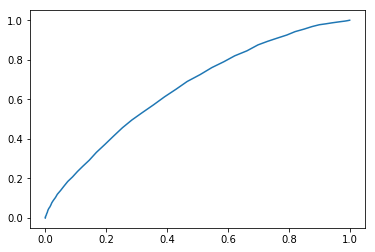

In [465]:
plt.plot(fpr,tpr,"-")

In [466]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
auc(fpr, tpr)
#auc(tpr, fpr)

0.656705498351869

In [467]:
pd.Series(mod.feature_importances_,index=x.columns).sort_values(ascending=False)

eqpdays                 0.072187
change_mou              0.066207
avgmou                  0.063866
avg3mou                 0.063725
mou_range               0.062717
rev_mean                0.060772
comp_vce_per            0.059342
rev_range               0.057959
plcd_vce_mean           0.056071
months                  0.050086
drop_vce_mean           0.045412
totmrc_mean             0.045352
owylis_vce_range        0.044402
age1                    0.041268
iwylis_vce_mean         0.039472
hnd_price               0.027046
uniqsubs                0.014899
models                  0.012531
datovr_range            0.011338
actvsubs                0.010023
ethnic_t_n              0.009298
dwlltype_t_s            0.008758
crclscod_t_aa           0.008222
marital_t_s             0.007743
prizm_social_one_t_t    0.007730
ethnic_t_s              0.006860
ethnic_t_u              0.006424
crclscod_t_ba           0.005949
refurb_new_t_r          0.005792
hnd_webcap_t_wcmb       0.005332
prizm_soci

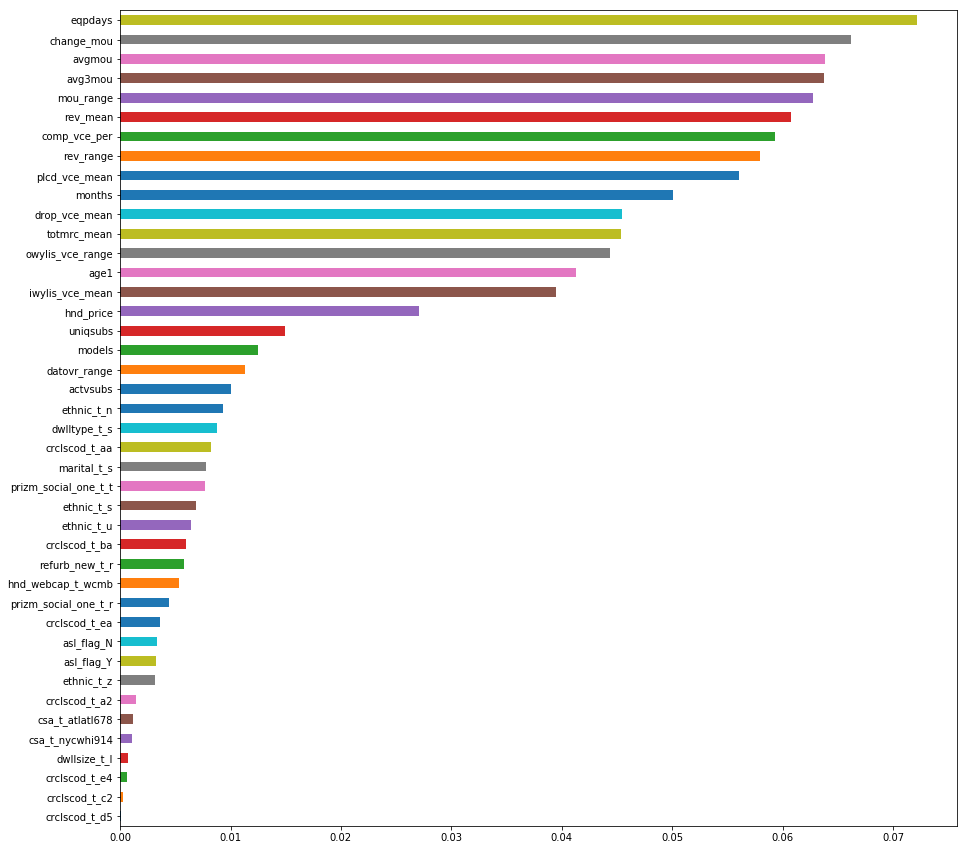

In [468]:
feat_importances = pd.Series(mod.feature_importances_, index=x.columns).sort_values(ascending=True)
#feat_importances.nlargest(30).plot(kind='barh', figsize=(20,10))
feat_importances.plot(kind='barh', figsize=(15,15))

In [ ]:
prediction_of_probability = mod3.predict(X_test)

In [ ]:
# Create new dataframe to store test data.
df1 = pd.DataFrame(X_test)
df1['Target'] = y_test
df1['prob'] = prediction_of_probability[:,0]  

# Create another dataframe to store train data
df2 = pd.DataFrame(X_train)
df2['Target'] = y_train

# Append both dataframes
df = df1.append(df2).sort_index()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train),rf.oob_score_, rf.score(X_valid, y_valid)))
       